In [ ]:
import tensorflow as tf #imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

from tensorflow import keras
import numpy as np

In [ ]:
(X_train_full, y_train_full), (X_test, y_test)=keras.datasets.fashion_mnist.load_data() #loading dataset

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape
X_train_full.dtype #getting datatype

dtype('uint8')

In [ ]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]  #spliting dataset

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] #labeling classes


In [ ]:
class_names[y_train[0]]

'Coat'

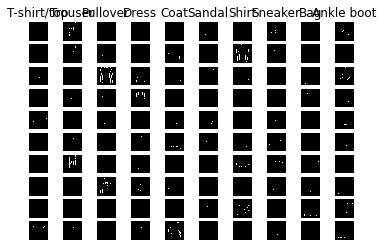

In [ ]:
num_classes = len(class_names)
for y, cls in enumerate(class_names):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs,10, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(10, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [ ]:
model = keras.models.Sequential() #flattening and creating 3 dense layers
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy", 
 optimizer="sgd",
 metrics=["accuracy"])  #using cross entropy to calculate loss

In [ ]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid)) #training with 30 epochs

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7303 - accuracy: 0.7592 - val_loss: 0.5051 - val_accuracy: 0.8330
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4938 - accuracy: 0.8264 - val_loss: 0.4467 - val_accuracy: 0.8486
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4476 - accuracy: 0.8437 - val_loss: 0.4100 - val_accuracy: 0.8662
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4199 - accuracy: 0.8530 - val_loss: 0.4023 - val_accuracy: 0.8622
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3980 - accuracy: 0.8608 - val_loss: 0.3770 - val_accuracy: 0.8696
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3817 - accuracy: 0.8667 - val_loss: 0.3707 - val_accuracy: 0.8748
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3688 - accuracy: 0.8711 - val_loss: 0.3843 - val_accuracy

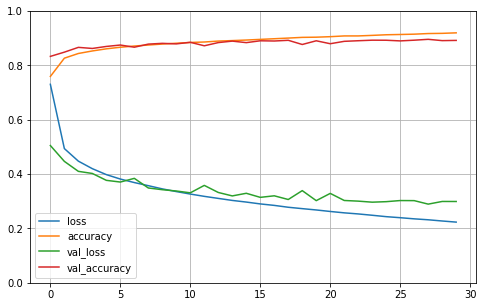

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
model.evaluate(X_test,y_test) #evaluating model

313/313 [==============================] - 1s 3ms/step - loss: 66.7998 - accuracy: 0.8408


[66.79979705810547, 0.8407999873161316]

In [ ]:
pred_probs=model.predict(X_test[:3])

In [ ]:
pred_probs.argmax(axis=1)

array([9, 2, 1])

In [ ]:
pred_class=np.array(class_names)[pred_probs.argmax(axis=1)]

In [ ]:
pred_class

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
np.array(class_names)[y_test[:3]]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')